Classificação de imagens de roupa.\
Resolvendo problema de classificação\
Datase do keras\
Usaremos este conjunto de dados, que se encontra no keras, que fica em cima do TensorFlow. Dentro do Keras, ele está em uma parte de conjunto de dados, ou datasets. É assim que acessamos um dataset dentro do Keras.

In [16]:
# !pip install --upgrade tensorflow

In [17]:
# deep learing
import tensorflow
from tensorflow import keras

# Gráficos
import matplotlib.pyplot as plt

# tratamento de dados
import numpy as np

In [18]:
dataset = keras.datasets.fashion_mnist

In [19]:
# carregando os dados
((imagens_treino, identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()



# from sklearn.model_selection import train_test_split

# # Supondo que imagens_treino e identificacoes_treino sejam seus dados
# imagens_treino, imagens_validacao, identificacoes_treino, identificacoes_validacao = train_test_split(
#     imagens_treino, identificacoes_treino, test_size=0.2, random_state=42)

# modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_data=(imagens_validacao, identificacoes_validacao))


In [20]:
# quantidade
print(len(imagens_treino))
print(imagens_treino.shape)
print(len(identificacoes_treino))
print(len(identificacoes_teste))

60000
(60000, 28, 28)
60000
10000


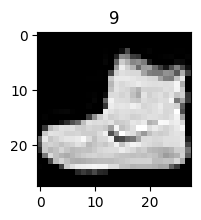

In [21]:
# visualizando imagens pelo gráfico
plt.figure(figsize=(4, 2))  # O tamanho é definido em polegadas
# Exibindo a primeira imagem do conjunto de dados de treinamento
plt.imshow(imagens_treino[0], cmap='gray')
plt.title(identificacoes_treino[0])
# Mostrando a imagem
plt.show()

In [22]:
# identificações
print(identificacoes_treino.min())
print(identificacoes_treino.max())
print('Quindade de classificações:')
print(np.unique(identificacoes_treino))

0
9
Quindade de classificações:
[0 1 2 3 4 5 6 7 8 9]


In [23]:
total_de_classificacoes = len(np.unique(identificacoes_treino))
total_de_classificacoes

10

In [24]:
nomes_de_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

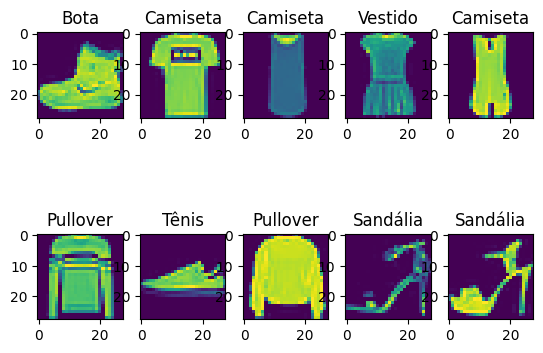

In [25]:
for imagem in range(total_de_classificacoes):
  # 5 - colunas, 2 linhas
  plt.subplot(2,5,imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

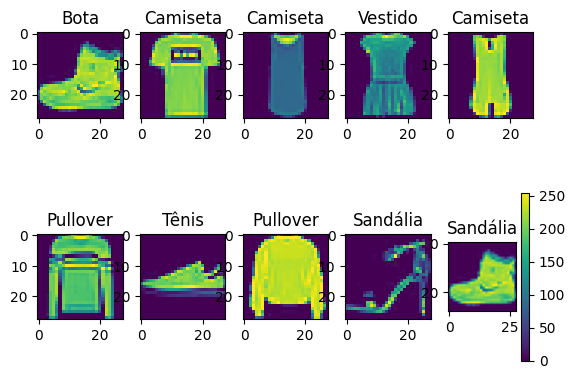

In [26]:
for imagem in range(total_de_classificacoes):
  # 5 - colunas, 2 linhas
  plt.subplot(2,5,imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

In [27]:
identificacoes_treino[0]

9

Etapa do Modelo

1- etapa:
- Entrada
- Processamento
- Saída

2- etapa:
- compilar o modelo.

3- etapa:
- treinar o modelo.

In [28]:
imagens_treino = imagens_treino/float(255)

# adicionando uma métrica
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7874 - loss: 0.6115
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8642 - loss: 0.3759
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8797 - loss: 0.3259
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8863 - loss: 0.3067
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8950 - loss: 0.2828


In [29]:
imagens_treino.shape

(60000, 28, 28)

In [30]:
testes = modelo.predict(imagens_teste)
testes[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [31]:
# argmax -> maior argumento é da bilbioteca do numpy
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imgam de teste: {identificacoes_teste[0]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado teste 9
número da imgam de teste: 9


In [32]:
# Critério de avaliação
# retorna uma array com dois valores a primeira é a perda e o segundo é a acuracia.
modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 55.4400


[58.90865707397461, 0.8632000088691711]

In [33]:
perda_teste , acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print(f'Perda do teste {perda_teste:.2f} \nAcurácia do teste {acuracia_teste:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 55.4400
Perda do teste 58.91 
Acurácia do teste 0.86


In [34]:
# adicionando a quantidade para validação
# modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

In [35]:
imagens_treino = imagens_treino / 255.0
# imagens_teste = imagens_teste / 255.0 Desativado temporariamente

# adicionando uma métrica
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # desativando alguns neuronios para poder não execultar como vinte porcento.
    keras.layers.Dense(10, tensorflow.nn.softmax)
                           ])


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5449 - loss: 1.5022 - val_accuracy: 0.7540 - val_loss: 0.6984
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7536 - loss: 0.6928 - val_accuracy: 0.7875 - val_loss: 0.5882
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7822 - loss: 0.6018 - val_accuracy: 0.8073 - val_loss: 0.5368
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8056 - loss: 0.5422 - val_accuracy: 0.8198 - val_loss: 0.5036
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8171 - loss: 0.5108 - val_accuracy: 0.8291 - val_loss: 0.4803
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8273 - loss: 0.4833 - val_accuracy: 0.8347 - val_loss: 0.4620
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8311 - loss: 0.4727 - val_accuracy: 0.8388 - val_loss: 0.4505
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8397 - loss: 0

In [36]:
# Resumindo o modelo de cada etapa de cada camada.
sumario_do_modelo = modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

In [37]:
historico.history

{'accuracy': [0.6512916684150696,
  0.7616458535194397,
  0.7905833125114441,
  0.8079166412353516,
  0.820229172706604,
  0.8288124799728394,
  0.8341249823570251,
  0.8395416736602783,
  0.8429791927337646,
  0.846875011920929],
 'loss': [1.0951683521270752,
  0.6608507037162781,
  0.5818702578544617,
  0.5362082719802856,
  0.5053132772445679,
  0.482658326625824,
  0.46508321166038513,
  0.4507519006729126,
  0.44044196605682373,
  0.43033137917518616],
 'val_accuracy': [0.7540000081062317,
  0.7875000238418579,
  0.8072500228881836,
  0.8197500109672546,
  0.8290833234786987,
  0.8346666693687439,
  0.8388333320617676,
  0.8410000205039978,
  0.8444166779518127,
  0.8482499718666077],
 'val_loss': [0.6984072923660278,
  0.5881527662277222,
  0.536782443523407,
  0.5035549998283386,
  0.4802836775779724,
  0.46199649572372437,
  0.4504845440387726,
  0.4376489520072937,
  0.4318722188472748,
  0.42124107480049133]}

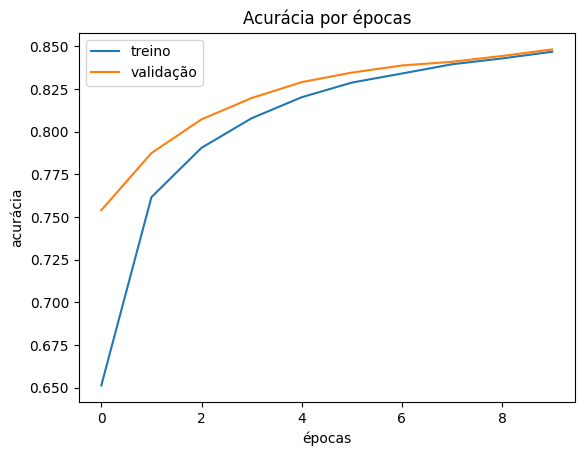

In [38]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

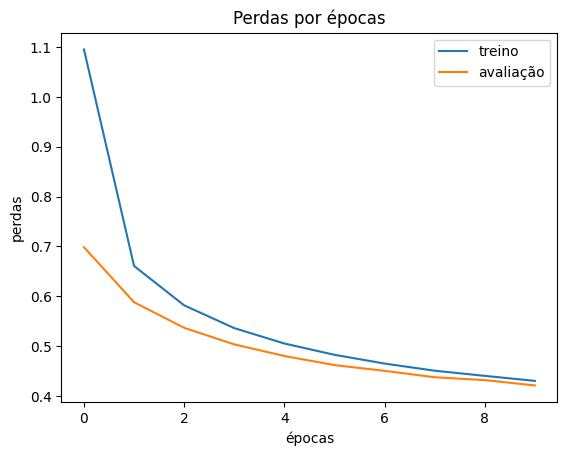

In [39]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

In [40]:
# pesos da camada 1, camada Dense 'layers[1]'
pesos_camada_dense = modelo.layers[1].get_weights()[0]

# pesos da camada 1, camada Dense 'layers[1]'
modelo.layers[1].get_weights()[0]


array([[ 0.03142221, -0.0056064 , -0.0488873 , ..., -0.04172455,
        -0.02371529,  0.05049762],
       [-0.20025581, -0.28821456, -0.0152619 , ...,  0.1583601 ,
        -0.0101887 , -0.06604646],
       [-0.4797275 , -0.4507197 ,  0.01830961, ...,  0.37545487,
        -0.00641583, -0.0617706 ],
       ...,
       [ 0.30653825, -0.763897  ,  0.00733916, ...,  0.82055795,
        -0.0590025 ,  0.002366  ],
       [ 0.2371406 , -0.37775034,  0.03985065, ...,  0.85481435,
         0.03002245, -0.01515035],
       [-0.17956743, -0.4895216 ,  0.02837726, ...,  0.6704072 ,
        -0.04900762, -0.05694421]], dtype=float32)

In [41]:
# alem do pesos temos os vieses
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 1.17625520e-01,  1.32119423e-02, -5.34034800e-03, -6.00307435e-03,
       -8.47194530e-03,  1.73128337e-01,  9.11755115e-03, -5.03068510e-03,
        1.23642892e-01,  1.39874041e-01,  6.45842552e-02, -6.11334015e-03,
       -1.30481701e-02,  5.86437620e-02,  7.05909505e-02,  1.22530773e-01,
       -5.30590340e-02,  6.02091439e-02,  8.74083042e-02, -8.37483536e-03,
       -9.45409015e-03, -7.71660823e-03,  1.06764100e-01,  1.38235092e-01,
        1.03227369e-01, -5.10938233e-03,  1.02220193e-01,  9.00254846e-02,
        6.18958883e-02,  1.73015177e-01, -6.46732701e-03,  8.18402879e-03,
       -7.26007903e-03, -7.69951148e-03, -5.99886663e-03, -1.83490925e-02,
        5.86331896e-02,  7.78396577e-02,  1.51994810e-01, -7.00975209e-03,
        8.10702741e-02,  3.78989317e-02, -5.94314234e-03, -5.83831361e-03,
        5.92285618e-02,  4.15856950e-02, -8.39202851e-03, -9.27414093e-03,
       -4.19934513e-03, -6.41077338e-03, -8.61772802e-03,  5.72004355e-02,
        2.88237333e-02, -

In [42]:
# pesos da camada 1, camada Dense 'layers[1]'
# 200960 -> 784 mais 1 que é igual 785 multiplica por 256 que é 200.960
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

Tetando valores zero para os pesos.

- pesos zerado
- vieses padrão da bilioteca

In [43]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense.shape

(784, 256)

In [44]:
# Inicializando os pesos com os zeros, então adicionando as quantidades de zeros na array.
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# no codigo abaixo o get é para visualizar os dados porem  eu posso mudar os pesos atribuindo o set.
# pesos_camada_dense = modelo.layers[1].get_weights()[0]

# eu zero os pesos mais os vieses continua.
pesos_camada_dense = modelo.layers[1].set_weights([pesos_camada_dense_zerados,vieses_camada_dense])

In [46]:
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 1.17625520e-01,  1.32119423e-02, -5.34034800e-03, -6.00307435e-03,
        -8.47194530e-03,  1.73128337e-01,  9.11755115e-03, -5.03068510e-03,
         1.23642892e-01,  1.39874041e-01,  6.45842552e-02, -6.11334015e-03,
        -1.30481701e-02,  5.86437620e-02,  7.05909505e-02,  1.22530773e-01,
        -5.30590340e-02,  6.02091439e-02,  8.74083042e-02, -8.37483536e-03,
        -9.45409015e-03, -7.71660823e-03,  1.06764100e-01,  1.38235092e-01,
         1.03227369e-01, -5.10938233e-03,  1.02220193e-01,  9.00254846e-02,
         6.18958883e-02,  1.73015177e-01, -6.46732701e-03,  8.18402879e-03,
        -7.26007903e-03, -7.69951148e-03, -5.99886663e-03, -1.83490925e-02,
         5.86331896e-02,  7.78396577e-02,  1.5199481

In [47]:
# rodando o modelo com os pesos zerados pois foi atribuidos

modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)


# não é certo inicializar os pesos com zero porque como a distriução dos dados tem que assimetricos.

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5744 - loss: 1.3400 - val_accuracy: 0.7904 - val_loss: 0.6194
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7838 - loss: 0.6177 - val_accuracy: 0.8152 - val_loss: 0.5282
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8124 - loss: 0.5383 - val_accuracy: 0.8258 - val_loss: 0.4874
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8251 - loss: 0.4943 - val_accuracy: 0.8328 - val_loss: 0.4682
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8341 - loss: 0.4686 - val_accuracy: 0.8437 - val_loss: 0.4463


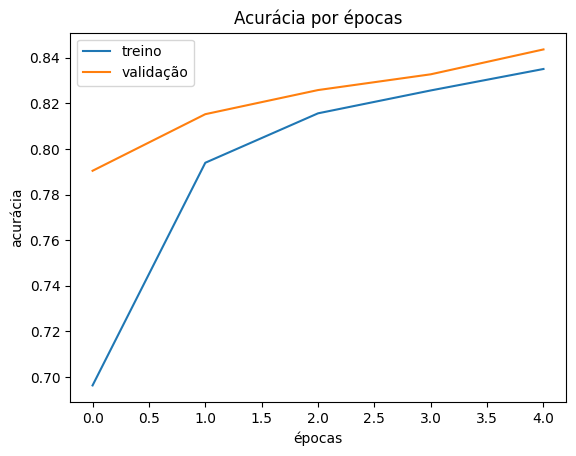

In [48]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

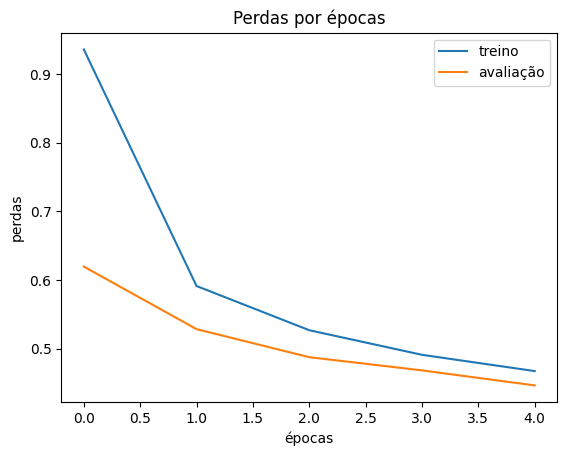

In [49]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

Testando os valores alatorios para os pesos

- pesos aleatorios
- vieses padrão do modelo

In [50]:
# iniciando os pesos com números aleatorios
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos = pesos_camada_dense.shape
#pesos_camada_dense_aleatorios = np.
pesos_camada_dense_aleatorios = np.random.rand(pesos[0],pesos[1])

In [51]:
# passando os pesos aleatorio para camada dense
pesos_camada_dense = modelo.layers[1].set_weights([pesos_camada_dense_aleatorios,vieses_camada_dense])

In [52]:
# rodando o modelo com os pesos zerados pois foi atribuidos

modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3555 - loss: 4.0360 - val_accuracy: 0.7626 - val_loss: 0.6631
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7194 - loss: 0.8833 - val_accuracy: 0.7975 - val_loss: 0.5936
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7659 - loss: 0.6994 - val_accuracy: 0.8034 - val_loss: 0.5576
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7934 - loss: 0.6008 - val_accuracy: 0.8160 - val_loss: 0.5339
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8058 - loss: 0.5613 - val_accuracy: 0.8295 - val_loss: 0.4960


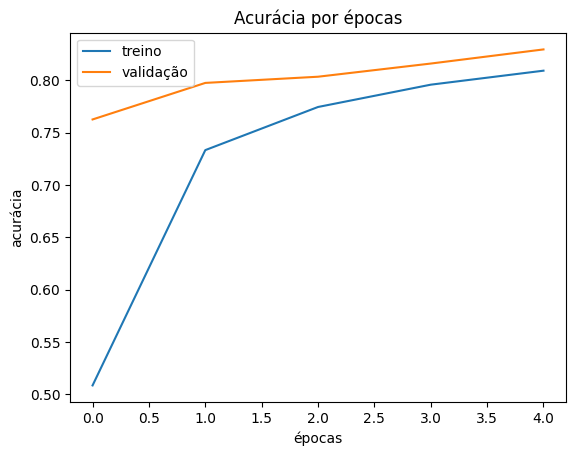

In [53]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

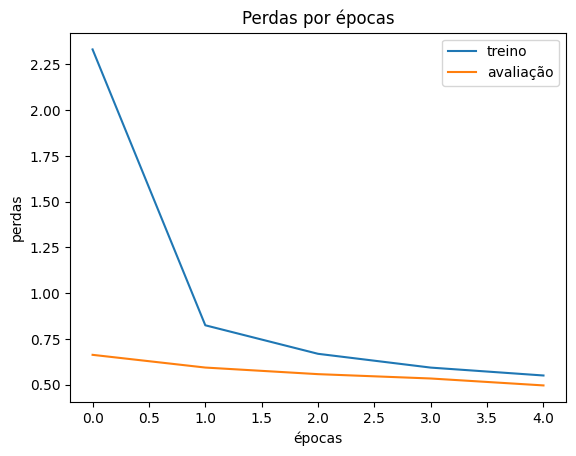

In [54]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

Entendendo as configuração do modelo

In [55]:
# conguração e os tipos que ele ta usando.
modelo.get_config()
# resumindo o peso é inicializado por GlorotUniform
# O objetivo da Inicialização Xavier é inicializar os pesos
# de modo que a variância das ativações seja a mesma em toda
# as camadas. Essa variância constante ajuda a evitar que o gradiente exploda ou desapareça.

{'name': 'sequential_3',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_3'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_3',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
  

Testando os Vieses com valores zeros.

1 - processo
- vieses zerado
- pesos zerado

2 - processo
- pesos aleatorios
- vieses zerado

In [56]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [57]:
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)

In [58]:
# passando os pesos zerados e viesses zerado para o modelo
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados,vieses_camada_dense_zerados]
)


In [59]:
# execultando o modelo
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0995 - loss: 2.3384 - val_accuracy: 0.0995 - val_loss: 2.3037
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1002 - loss: 2.3031 - val_accuracy: 0.1013 - val_loss: 2.3026
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0959 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0971 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3028


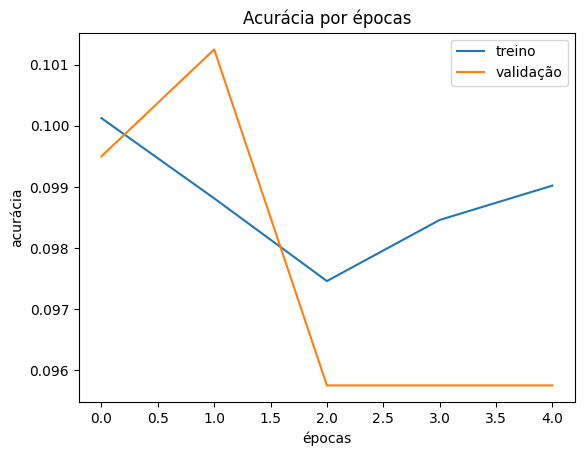

In [60]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

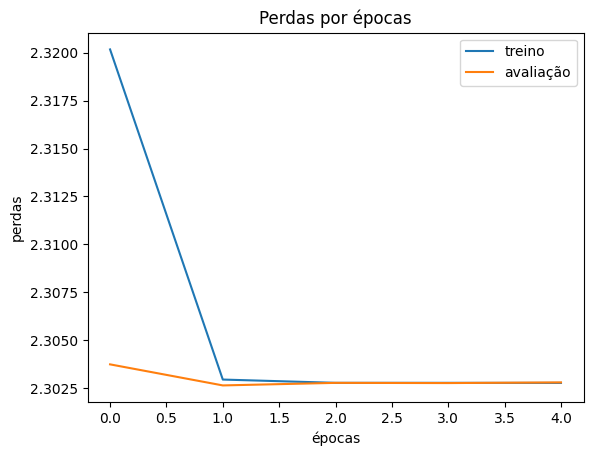

In [61]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

In [62]:
# passando os pesos aleatorios e viesses zerado para o modelo
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios,vieses_camada_dense_zerados]
)


In [63]:
# execultando o modelo
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3879 - loss: 2.9801 - val_accuracy: 0.7681 - val_loss: 0.6662
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7230 - loss: 0.8338 - val_accuracy: 0.7929 - val_loss: 0.5992
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7633 - loss: 0.6925 - val_accuracy: 0.8048 - val_loss: 0.5547
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7860 - loss: 0.6135 - val_accuracy: 0.8126 - val_loss: 0.5342
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8074 - loss: 0.5621 - val_accuracy: 0.8235 - val_loss: 0.5073


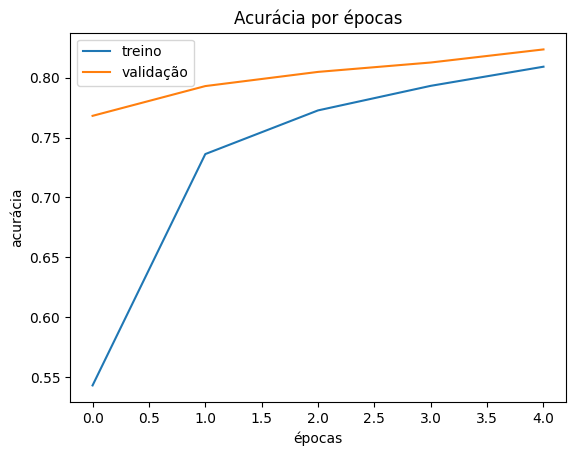

In [64]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

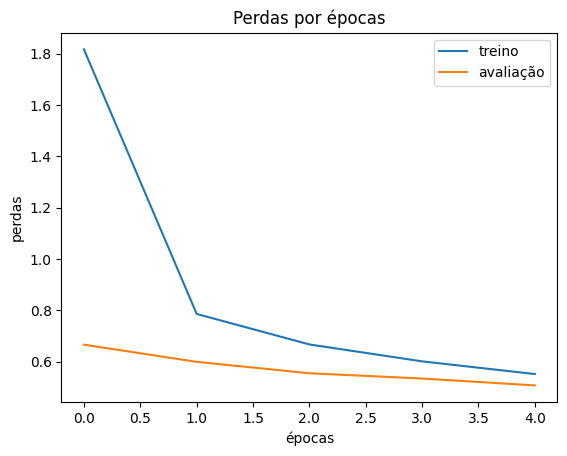

In [65]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

# Dense

saída = ReLU(multiplica(entrada,peso) + viés)

(dot(input, kernel) + bias)

((input dot kernel) + bias)

((i*w) + b)

# Hiperparametros


Argumentos

learning_rate: Um float, uma instância keras.optimizers.schedules.

LearningRateSchedule ou um callable que não aceita argumentos e retorna o valor real a ser usado. A taxa de aprendizado. O padrão é 0,001.

beta_1: Um valor float ou um tensor float constante ou um callable que não aceita argumentos e retorna o valor real a ser usado. A taxa de decaimento exponencial para as estimativas do 1º momento. O padrão é 0,9.

beta_2: Um valor float ou um tensor float constante ou um callable que não aceita argumentos e retorna o valor real a ser usado. A taxa de decaimento exponencial para as estimativas do 2º momento. O padrão é 0,999.  
                                     
epsilon: Uma pequena constante para estabilidade numérica. Este epsilon é "epsilon hat" no artigo Kingma e Ba (na fórmula logo antes da Seção 2.1), não o epsilon no Algoritmo 1 do artigo. O padrão é 1e-7.
amsgrad: Booleano. Se deve aplicar a variante AMSGrad deste algoritmo do artigo "Sobre a Convergência de Adão e além". O padrão é Falso.

name: String. O nome a ser usado para pesos do acumulador de momentum criados pelo otimizador.
weight_decay: Flutuante. Se definido, o decaimento de peso é aplicado.
clipnorm: Flutuante. Se definido, o gradiente de cada peso é cortado individualmente para que sua norma não seja maior que este valor.
clipvalue: Flutuante. Se definido, o gradiente de cada peso é cortado para que não seja maior que este valor.

global_clipnorm: Flutuante. Se definido, o gradiente de todos os pesos é cortado para que sua norma global não seja maior que este valor.

use_ema: Booleano, o padrão é Falso. Se Verdadeiro, a média móvel exponencial (EMA) é aplicada. A EMA consiste em calcular uma média móvel exponencial dos pesos do modelo (conforme os valores de peso mudam após cada lote de treinamento) e substituir periodicamente os pesos por sua média móvel.

ema_momentum: Float, padrão 0,99. Usado somente se use_ema=True. Este é o momentum a ser usado ao calcular a EMA dos pesos do modelo: new_average = ema_momentum * old_average + (1 - ema_momentum) * current_variable_value.
ema_overwrite_frequency: Int ou None, padrão None. Usado somente se use_ema=True. A cada passo ema_overwrite_frequency de iterações, substituímos a variável do modelo por sua média móvel. Se None, o otimizador não substitui as variáveis ​​do modelo no meio do treinamento, e você precisa substituir explicitamente as variáveis ​​no final do treinamento chamando optimizer.finalize_variable_values() (que atualiza as variáveis ​​do modelo no local). Ao usar o loop de treinamento fit() integrado, isso acontece automaticamente após a última época, e você não precisa fazer nada.

loss_scale_factor: Float ou None. Se for um float, o fator de escala será multiplicado pela perda antes de calcular os gradientes, e o inverso do fator de escala será multiplicado pelos gradientes antes de atualizar as variáveis. Útil para evitar estouro durante o treinamento de precisão mista. Como alternativa, keras.optimizers.LossScaleOptimizer definirá automaticamente um fator de escala de perda.

gradient_accumulation_steps: Int ou None. Se for um int, as variáveis ​​do modelo e do otimizador não serão atualizadas a cada passo; em vez disso, elas serão atualizadas a cada gradient_accumulation_steps passos, usando o valor médio dos gradientes desde a última atualização. Isso é conhecido como "acumulação de gradiente". Isso pode ser útil quando o tamanho do seu lote for muito pequeno, para reduzir o ruído do gradiente em cada passo de atualização.

In [66]:
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # desativando alguns neuronios para poder não execultar como vinte porcento.
    keras.layers.Dense(10, tensorflow.nn.softmax)
                           ])



# hiperparametro do adam
adam = keras.optimizers.Adam(learning_rate = 0.5)

modelo.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2990 - loss: 2.2284 - val_accuracy: 0.1003 - val_loss: 2.3409
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2010 - loss: 2.0421 - val_accuracy: 0.1902 - val_loss: 1.9051
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2181 - loss: 1.9824 - val_accuracy: 0.2587 - val_loss: 1.7802
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2231 - loss: 1.9817 - val_accuracy: 0.0995 - val_loss: 2.3819
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0987 - loss: 2.3558 - val_accuracy: 0.0983 - val_loss: 2.3902


In [67]:
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # desativando alguns neuronios para poder não execultar como vinte porcento.
    keras.layers.Dense(10, tensorflow.nn.softmax)
                           ])



# hiperparametro do adam
adam = keras.optimizers.Adam(learning_rate = 0.02)
# conjunto_de imagens = batch_size
modelo.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 480, epochs = 5, validation_split = 0.2)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2552 - loss: 5.9089 - val_accuracy: 0.5583 - val_loss: 1.2158
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4268 - loss: 1.5162 - val_accuracy: 0.5034 - val_loss: 1.2605
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4169 - loss: 1.5339 - val_accuracy: 0.4893 - val_loss: 1.2310
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4170 - loss: 1.5308 - val_accuracy: 0.4557 - val_loss: 1.2580
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4359 - loss: 1.5041 - val_accuracy: 0.5493 - val_loss: 1.1985


In [78]:
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # desativando alguns neuronios para poder não execultar como vinte porcento.
    keras.layers.Dense(10, tensorflow.nn.softmax)
                           ])



# hiperparametro do adam
adam = keras.optimizers.Adam(learning_rate = 0.002)
# conjunto_de imagens = batch_size


# call-back, o Keras nos ajuda a parar. Ele vai ver antes de mostrar durante o treinamento que o modelo está estacionando, e aí nós damos o stop para conseguir seguir.
parando_cedo = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo.keras', monitor='val_loss',save_best_only = True)]

modelo.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 480, epochs = 5, validation_split = 0.2, callbacks = parando_cedo)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3528 - loss: 2.1381 - val_accuracy: 0.5993 - val_loss: 1.3918
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6069 - loss: 1.2737 - val_accuracy: 0.6984 - val_loss: 0.9685
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6939 - loss: 0.9344 - val_accuracy: 0.7368 - val_loss: 0.7811
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7307 - loss: 0.7754 - val_accuracy: 0.7511 - val_loss: 0.6957
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7422 - loss: 0.7195 - val_accuracy: 0.7647 - val_loss: 0.6466


Salvando o modelo

In [68]:
# from tensorflow.keras.models import load_model
# # tf.keras.models.load_model
# # Salvar o modelo no formato nativo Keras
# modelo.save('modelo.keras')


In [69]:
from tensorflow.keras.models import load_model
import tensorflow as tf # Importe 'tensorflow'

modelo.save('modelo.keras')
modelo_salvo = load_model('modelo.keras', custom_objects={'softmax_v2': tf.nn.softmax}) # Diga ao load_model como lidar com 'softmax_v2'

In [70]:

# Avaliar o modelo carregado com dados de teste
perda, precisao = modelo_salvo.evaluate(imagens_teste, identificacoes_teste, verbose=2)
print(f'Perda: {perda}, Precisão: {precisao}')

# Fazer previsões com o modelo carregado
previsoes = modelo_salvo.predict(imagens_teste)

313/313 - 1s - 3ms/step - accuracy: 0.1053 - loss: 954412.1250
Perda: 954412.125, Precisão: 0.10530000180006027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [71]:
# argmax -> maior argumento é da bilbioteca do numpy
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imgam de teste: {identificacoes_teste[0]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'resultado teste modelo salvo: {np.argmax(testes_modelo_salvo[1])}')
print(f'númeo da imgam de teste: {identificacoes_teste[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado teste 9
número da imgam de teste: 9
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste modelo salvo: 9
númeo da imgam de teste: 2


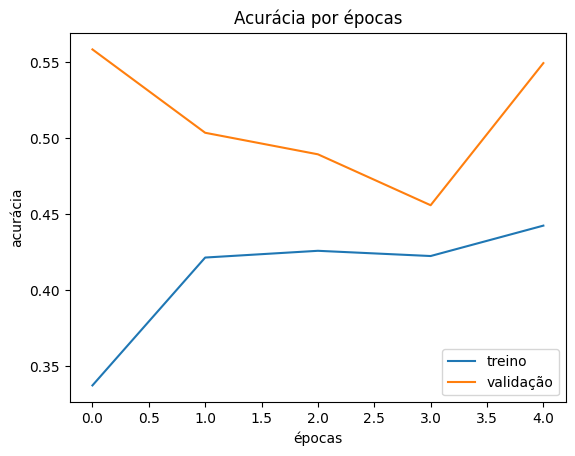

In [72]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])